## Import libraries

In [513]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

## import dataset

In [514]:
df_titanic = pd.read_csv('titanic.csv')
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 888 entries, 0 to 887
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  888 non-null    int64  
 1   Survived     888 non-null    int64  
 2   Pclass       888 non-null    float64
 3   Name         888 non-null    object 
 4   Sex          888 non-null    int64  
 5   Age          715 non-null    float64
 6   SibSp        888 non-null    int64  
 7   Parch        887 non-null    float64
 8   Ticket       887 non-null    object 
 9   Fare         886 non-null    float64
 10  Embarked     886 non-null    float64
dtypes: float64(5), int64(4), object(2)
memory usage: 76.4+ KB


# Outliers

In [515]:
df_titanic.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,888.000000,888.000000,888.00000,888.000000,715.000000,888.000000,887.000000,886.000000,886.000000
mean,447.238739,0.382883,2.30518,1.351351,36.006993,0.602477,0.370913,32.024786,1.363431
std,257.528189,0.486364,0.84697,0.477662,165.601302,2.579661,0.769751,49.947084,0.636884
min,1.000000,0.000000,-2.00000,1.000000,-12.000000,0.000000,0.000000,-90.000000,1.000000
25%,224.750000,0.000000,2.00000,1.000000,20.000000,0.000000,0.000000,7.900000,1.000000
50%,446.500000,0.000000,3.00000,1.000000,28.000000,0.000000,0.000000,14.450000,1.000000
75%,669.250000,1.000000,3.00000,2.000000,38.000000,1.000000,0.000000,30.700000,2.000000
max,1000.000000,1.000000,3.00000,2.000000,4435.000000,70.000000,5.000000,512.330000,3.000000


We will handle the outlier of those six columns above.

### Survived

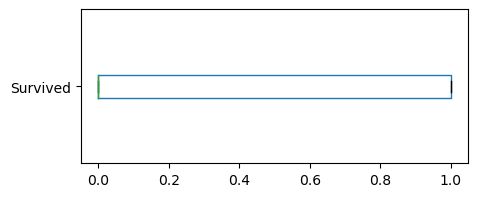

In [517]:
df_titanic.boxplot(column=['Survived'],fontsize=10,rot=0,grid=False,figsize=(5,2),vert=False)
plt.show()

In [518]:
UB = df_titanic['Survived'].mean() + 3 * df_titanic['Survived'].std() 
LB = df_titanic['Survived'].mean() - 3 * df_titanic['Survived'].std()
print("upper bound:", UB)
print("lower bound:", LB)

upper bound: 1.8419749614629053
lower bound: -1.0762091956971398


In [519]:
df_titanic[(df_titanic['Survived'] < LB) | (df_titanic['Survived'] > UB)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked


### Pclass

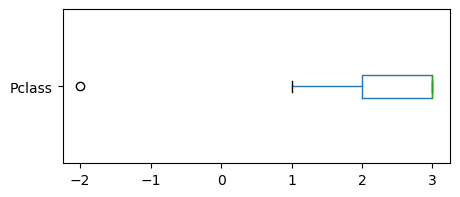

In [524]:
df_titanic.boxplot(column=['Pclass'],fontsize=10,rot=0,grid=False,figsize=(5,2),vert=False)
plt.show()

In [525]:
UB = df_titanic['Pclass'].mean() + 3 * df_titanic['Pclass'].std() 
LB = df_titanic['Pclass'].mean() - 3 * df_titanic['Pclass'].std()
print("upper bound:", UB)
print("lower bound:", LB)

upper bound: 4.846089111404655
lower bound: -0.23572875104429514


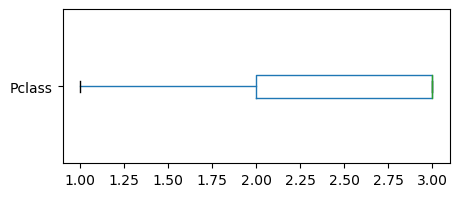

In [526]:
df_titanic['Pclass'][(df_titanic['Pclass'] < LB) | (df_titanic['Pclass'] > UB)] = np.median(df_titanic['Pclass'])

df_titanic.boxplot(column=['Pclass'],fontsize=10,rot=0,grid=False,figsize=(5,2),vert=False)
plt.show()

### Age

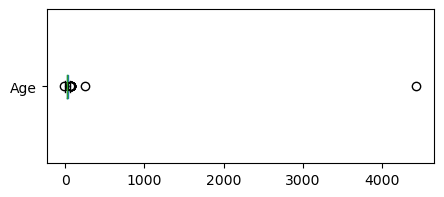

In [528]:
df_titanic.boxplot(column=['Age'],fontsize=10,rot=0,grid=False,figsize=(5,2),vert=False)
plt.show()

In [529]:
UB = df_titanic['Age'].mean() + 3 * df_titanic['Age'].std() 
LB = df_titanic['Age'].mean() - 3 * df_titanic['Age'].std()
print("upper bound:", UB)
print("lower bound:", LB)

upper bound: 532.8108994006564
lower bound: -460.7969133866704


In [530]:
df_titanic['Age'][(df_titanic['Age'] < LB) | (df_titanic['Age'] > UB)] = np.median(df_titanic['Age'])

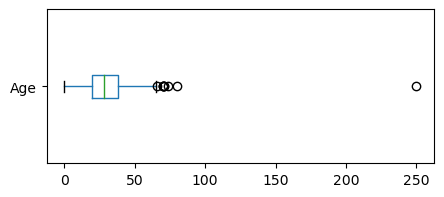

In [531]:
df_titanic.Age = df_titanic['Age'].abs()
df_titanic.boxplot(column=['Age'],fontsize=10,rot=0,grid=False,figsize=(5,2),vert=False)
plt.show()

### SibSp

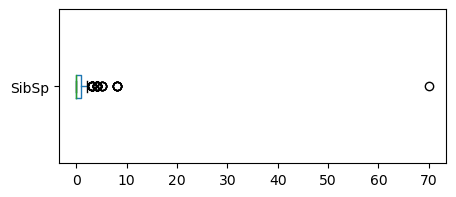

In [533]:
df_titanic.boxplot(column=['SibSp'],fontsize=10,rot=0,grid=False,figsize=(5,2),vert=False)
plt.show()

In [534]:
UB = df_titanic['SibSp'].mean() + 3 * df_titanic['SibSp'].std() 
LB = df_titanic['SibSp'].mean() - 3 * df_titanic['SibSp'].std()
print("upper bound:", UB)
print("lower bound:", LB)

upper bound: 8.341459968440342
lower bound: -7.136505013485387


In [535]:
df_titanic['SibSp'][(df_titanic['SibSp'] < LB) | (df_titanic['SibSp'] > UB)] = np.median(df_titanic['SibSp'])

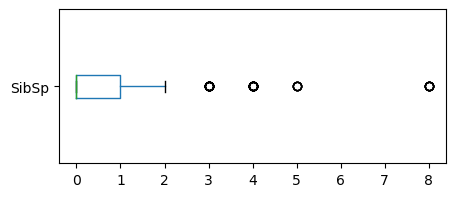

In [536]:
df_titanic.boxplot(column=['SibSp'],fontsize=10,rot=0,grid=False,figsize=(5,2),vert=False)
plt.show()

### Parch

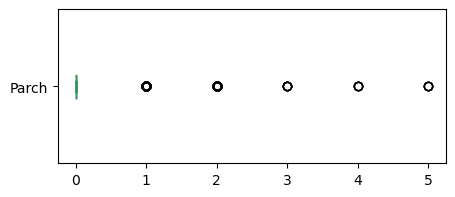

In [539]:
df_titanic.boxplot(column=['Parch'],fontsize=10,grid=False,figsize=(5,2), vert=False)
plt.show()

In [542]:
UB = df_titanic['Parch'].mean() + 3 * df_titanic['Parch'].std() 
LB = df_titanic['Parch'].mean() - 3 * df_titanic['Parch'].std()
print("upper bound:", UB)
print("lower bound:", LB)

upper bound: 2.680165862691097
lower bound: -1.9383394816313448


In [543]:
df_titanic['Parch'][(df_titanic['Parch'] < LB) | (df_titanic['Parch'] > UB)] = np.median(df_titanic['Parch'])

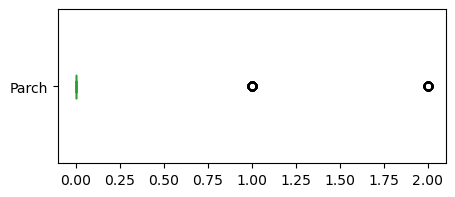

In [544]:
df_titanic.boxplot(column=['Parch'],fontsize=10,grid=False,figsize=(5,2), vert=False)
plt.show()

### Fare

In [546]:
#df_titanic['Fare'] = np.sqrt(df_titanic['Fare'])

In [547]:
#sns.distplot(df_titanic.Fare)
#plt.show()

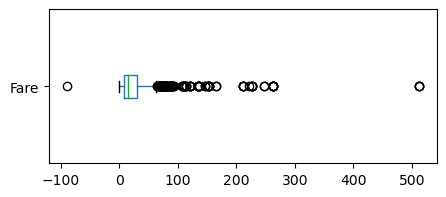

In [548]:
df_titanic.boxplot(column=['Fare'],fontsize=10,grid=False,figsize=(5,2), vert=False)
plt.show()

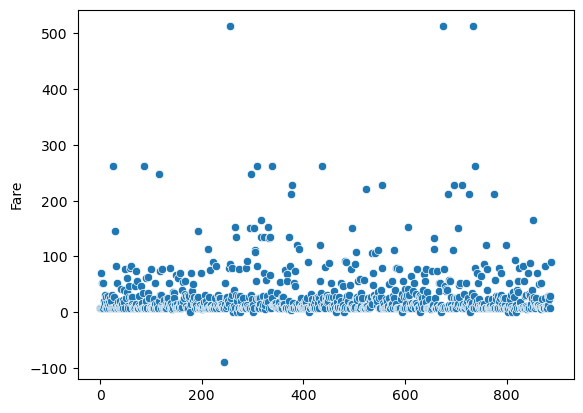

In [550]:
sns.scatterplot(data=df_titanic['Fare'])
plt.show()

In [549]:
UB = df_titanic['Fare'].mean() + 3 * df_titanic['Fare'].std() 
LB = df_titanic['Fare'].mean() - 3 * df_titanic['Fare'].std()
print("upper bound:", UB)
print("lower bound:", LB)

upper bound: 181.86603716680986
lower bound: -117.81646606071514


In [551]:
df_titanic['Fare'][(df_titanic['Fare'] < LB) | (df_titanic['Fare'] > UB)] = np.median(df_titanic['Fare'])

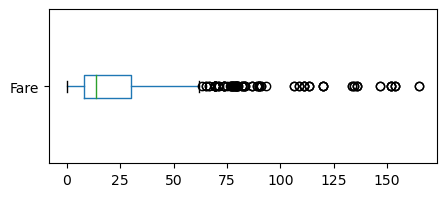

In [552]:
df_titanic.Fare = df_titanic['Fare'].abs()
df_titanic.boxplot(column=['Fare'],fontsize=10,rot=0,grid=False,figsize=(5,2),vert=False)
plt.show()

In [553]:
df_titanic.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,888.000000,888.000000,888.000000,888.000000,714.000000,888.000000,874.000000,866.000000,886.000000
mean,447.238739,0.382883,2.310811,1.351351,29.887955,0.523649,0.318078,26.521697,1.363431
std,257.528189,0.486364,0.834850,0.477662,16.771421,1.104211,0.632794,29.407047,0.636884
min,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,224.750000,0.000000,2.000000,1.000000,20.000000,0.000000,0.000000,7.900000,1.000000
50%,446.500000,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,13.825000,1.000000
75%,669.250000,1.000000,3.000000,2.000000,38.000000,1.000000,0.000000,29.925000,2.000000
max,1000.000000,1.000000,3.000000,2.000000,250.000000,8.000000,2.000000,164.870000,3.000000


In [554]:
df_titanic = df_titanic.drop(['PassengerId', 'Name', 'Ticket'], axis=1)
df_titanic.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3.0,1,22.0,1,0.0,7.25,1.0
1,1,1.0,2,38.0,1,0.0,71.28,2.0
2,1,3.0,2,26.0,0,0.0,7.92,1.0


In [555]:
# saving the dataframe
df_titanic.to_csv('titanic4_stdmean_median.csv', index=False)